In [1]:
import numpy as np
import pandas as pd
import math

The goal of the code below is to create an imitation of the calculator found in the link b, Created by Bogna Szyk and Łucja Zaborowska, MD

https://www.omnicalculator.com/sports/cycling-wattage

The goal is to use the data provided by this calculator to find the maximum inclination a cyclist can easily climb with a given weight, and fitness level. Tire type, chain health, and riding position will not be available as variables at this time. 


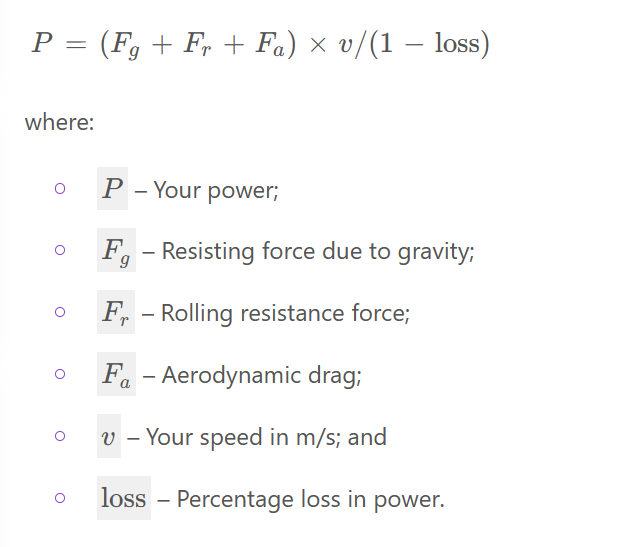

In [3]:
#P=(F_grav+F_roll+F_air)*speed/(1-loss)

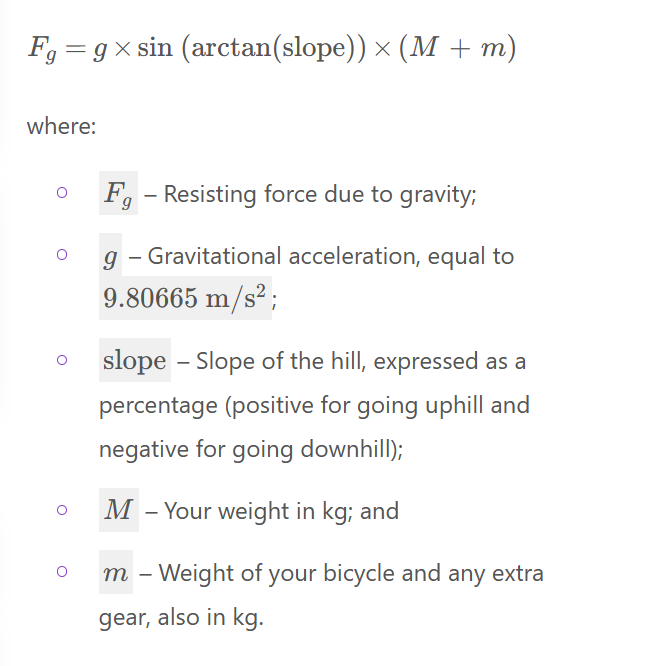

In [4]:
#F_grav=9.80665*sin(arctan(slope))*(rider_weight+bike_weight)

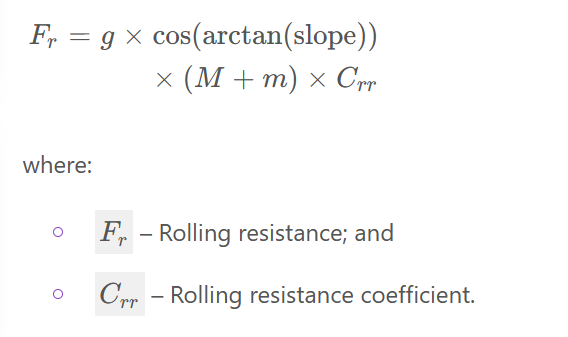

Assumung conrete and slick tires for this data output

In [18]:
surface='Concrete'
tire_type='Slick tires'
rolling_res_coefficient=df[df['Surface type'] == surface]['Slick tires'].values[0]

data = {
    'Surface type': ['Concrete', 'Asphalt', 'Gravel', 'Grass', 'Off-road', 'Sand'],
    'Slick tires': [0.0020, 0.0050, 0.0060, 0.0070, 0.0200, 0.0300],
    'Knobby tires': [0.0025, 0.0063, 0.0076, 0.0089, 0.0253, 0.0380]
}

df = pd.DataFrame(data)

#F_roll=9.80665*cos(arctan(slope))*(rider_weight+bike_weight)*rolling_res_coefficient


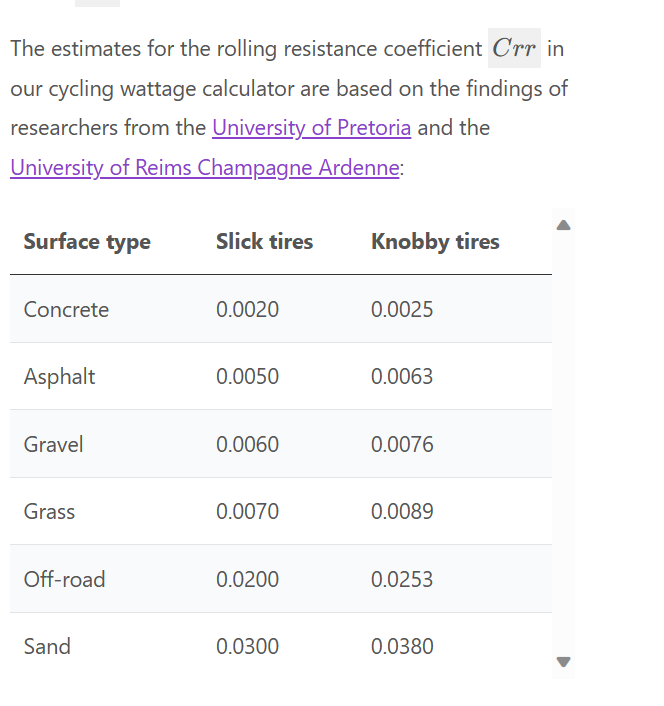


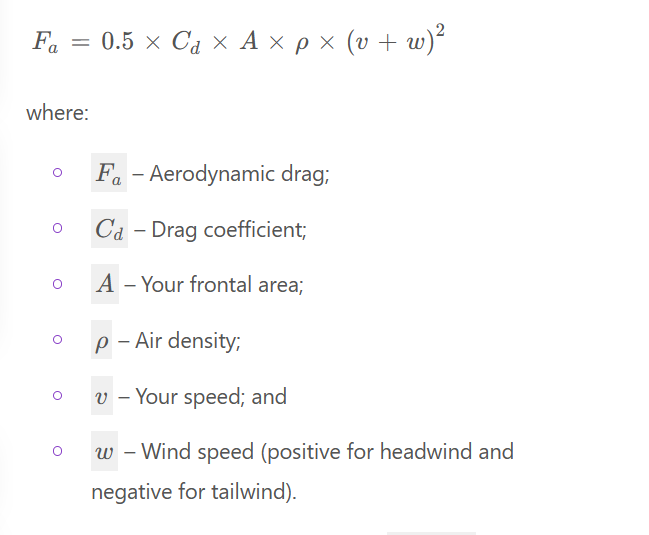

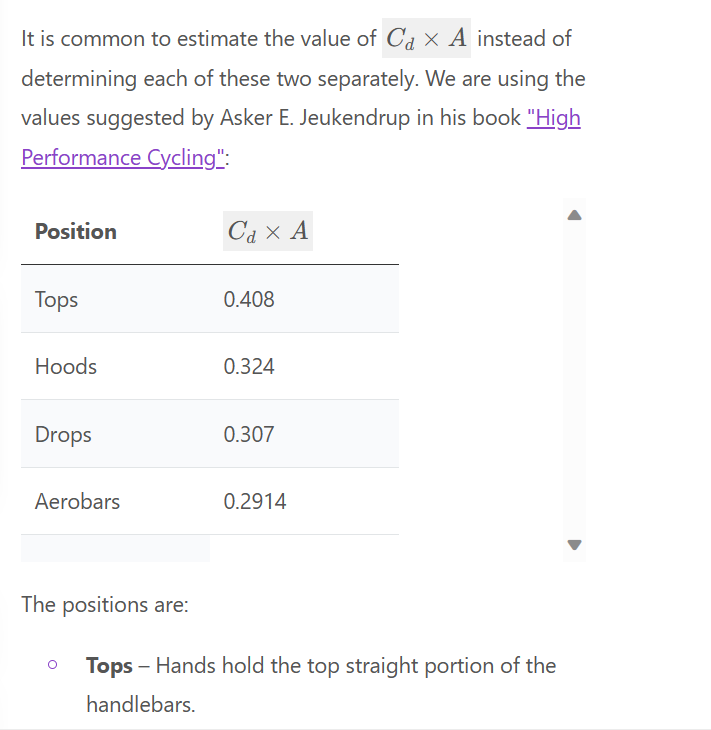

Only using tops riding style at this time for csv output


In [22]:
positions = {
    'Tops': 0.408,
    'Hoods': 0.324,
    'Drops': 0.307,
    'Aerobars': 0.2914
}
wind_speed=0
speed=1.68 #m/s
drag_times_frontal_area=positions['Tops']
air_density=1.225 #air density at sea level
F_air=0.5*drag_times_frontal_area*air_density*(speed+wind_speed)**2
F_air

0.7053177599999999

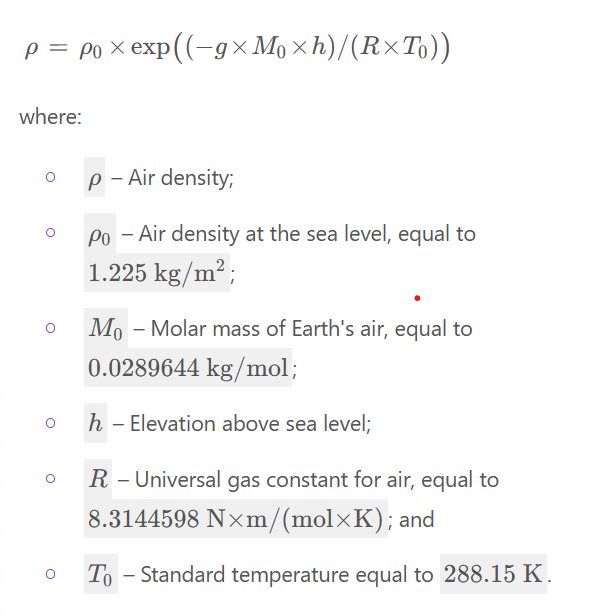

only using 1000m for air density which is roughly Calgary's

In [24]:
# Constants
rho_0 = 1.225  # Air density at sea level in kg/m^3
M_0 = 0.0289644  # Molar mass of Earth's air in kg/mol
R = 8.3144598  # Universal gas constant for air in N·m/(mol·K)
T_0 = 288.15  # Standard temperature in K

# Input elevation above sea level (h)
h = 1000  # Example elevation of 1000 meters above sea level

# Calculate air density (ρ)
rho = rho_0 * math.exp((-9.81 * M_0 * h) / (R * T_0))

print("Air density at", h, "meters above sea level:", rho, "kg/m^3")


Air density at 1000 meters above sea level: 1.0880007998806198 kg/m^3


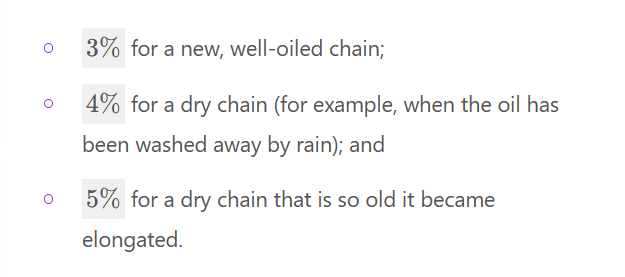

In [25]:
#assume a 5% loss for casual cyclists

In [ ]:

    # Constants
    rho_0 = 1.225  # Air density at sea level in kg/m^3
    M_0 = 0.0289644  # Molar mass of Earth's air in kg/mol
    R = 8.3144598  # Universal gas constant for air in N·m/(mol·K)
    T_0 = 288.15  # Standard temperature in K

    # Input elevation above sea level (h)
    h = 1000  # Example elevation of 1000 meters above sea level

    # Calculate air density (ρ)
    rho = rho_0 * math.exp((-9.81 * M_0 * h) / (R * T_0))


    F_roll=9.80665*cos(arctan(slope))*(rider_weight+bike_weight)*rolling_res_coefficient
    F_grav=9.80665*sin(arctan(slope))*(rider_weight+bike_weight)
    F_air=0.5*drag_times_frontal_area*air_density*(speed+wind_speed)**2
    P=(F_grav+F_roll+F_air)*speed/(1-loss)

In [38]:

# Function to calculate air density (ρ) at a given elevation (h)
def calculate_air_density(h):
    air_density = rho_0 * math.exp((-9.81 * M_0 * h) / (R * T_0))
    return air_density

# Function to calculate rolling resistance force (F_roll)
def calculate_rolling_resistance(slope, rider_weight, bike_weight, rolling_res_coefficient):
    F_roll = 9.80665 * math.cos(math.atan(slope)) * (rider_weight + bike_weight) * rolling_res_coefficient
    return F_roll

# Function to calculate gravitational force (F_grav)
def calculate_gravitational_force(slope, rider_weight, bike_weight):
    F_grav = 9.80665 * math.sin(math.atan(slope)) * (rider_weight + bike_weight)
    return F_grav

# Function to calculate air resistance force (F_air)
def calculate_air_resistance(drag_times_frontal_area, air_density, speed, wind_speed):
    F_air = 0.5 * drag_times_frontal_area * air_density * (speed + wind_speed)**2
    return F_air

# Function to calculate power (P)
def calculate_power(F_grav, F_roll, F_air, speed, loss):
    P = (F_grav + F_roll + F_air) * speed / (1 - loss)
    return P


In [ ]:
# Constants
rho_0 = 1.225
M_0 = 0.0289644
R = 8.3144598
T_0 = 288.15

# List of speeds and inclinations
speeds = [5, 10, 15, 20, 25]  # Example speeds in m/s
inclinations = [0.03, 0.05, 0.07, 0.1]  # Example inclinations (slopes)
rider_weight = 75
bike_weight = 10
rolling_res_coefficient = 0.02
drag_times_frontal_area = 0.3 # drag multiple by frontal area with Tops style 
wind_speed = 0
loss = 0.1

# Empty lists to store the results
results = []


In [36]:
# Convert the lists to NumPy arrays
rider_weight = np.array(range(20, 151))
bike_weights = np.array(range(5, 70))

# Create all possible combinations of elements from both arrays
combinations = np.add.outer(rider_weight, bike_weights)

# Find the minimum and maximum sums
min_sum = np.min(combinations)
max_sum = np.max(combinations)

print("Minimum Sum:", min_sum)
print("Maximum Sum:", max_sum)


Minimum Sum: 10
Maximum Sum: 219


In [1]:
#speeds in m/s from 5 km/h to 70km/hr in increments of 5
speeds = [1.38889,2.77778,4.16667,5.55556,6.94445,8.33334,9.72223,11.11112,12.50001,13.8889,15.27779,16.66668,18.05557,19.44446]
total_weights=list(range(10, 220))

start = 0
stop = 0.35
step = 0.005

inclinations = np.arange(start, stop + step, step)


NameError: name 'np' is not defined

In [49]:
# Constants
rho_0 = 1.225  # Air density at sea level in kg/m^3
M_0 = 0.0289644  # Molar mass of Earth's air in kg/mol
R = 8.3144598  # Universal gas constant for air in N·m/(mol·K)
T_0 = 288.15  # Standard temperature in K
# Create empty lists to store the results
wind_speed=0
results = []

# Calculate the outputs for various combinations of speeds, weights, and inclinations
for speed in speeds:
    for weight in total_weights:
        for slope in inclinations:
            air_density = rho_0 * math.exp((-9.81 * M_0 * 0) / (R * T_0))  # Assuming elevation is 0
            F_roll = 9.80665 * math.cos(math.atan(slope)) * (weight) * rolling_res_coefficient
            F_grav = 9.80665 * math.sin(math.atan(slope)) * (weight)
            F_air = 0.5 * drag_times_frontal_area * air_density * (speed + wind_speed)**2
            power = (F_grav + F_roll + F_air) * speed / (1 - 0.05)
            
            results.append({
                'Speed (m/s)': speed,
                'Weight (kg)': weight,
                'Inclination (slope)': slope,
                'Air Density (kg/m^3)': air_density,
                'Rolling Resistance (N)': F_roll,
                'Gravitational Force (N)': F_grav,
                'Air Resistance (N)': F_air,
                'Power (W)': power
            })

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Display the DataFrame
df.head(5)


,Speed (m/s),Weight (kg),Inclination (slope),Air Density (kg/m^3),Rolling Resistance (N),Gravitational Force (N),Air Resistance (N),Power (W)
0,1.38889,10,0.000,1.225,0.196133,0.000000,0.482061,0.991512
1,1.38889,10,0.005,1.225,0.196131,0.490326,0.482061,1.708361
2,1.38889,10,0.010,1.225,0.196123,0.980616,0.482061,2.425148
3,1.38889,10,0.015,1.225,0.196111,1.470832,0.482061,3.141821
4,1.38889,10,0.020,1.225,0.196094,1.960938,0.482061,3.858326


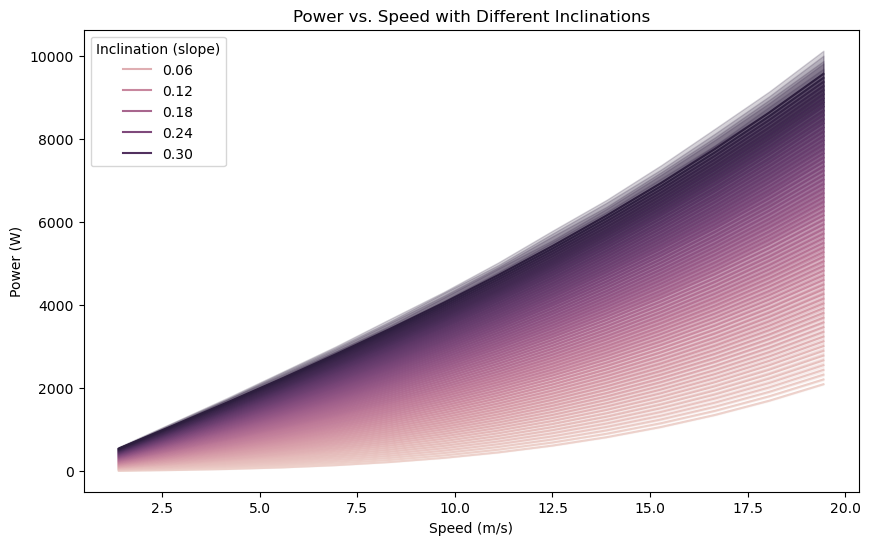

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Speed (m/s)', y='Power (W)', hue='Inclination (slope)')
plt.title('Power vs. Speed with Different Inclinations')
plt.show()


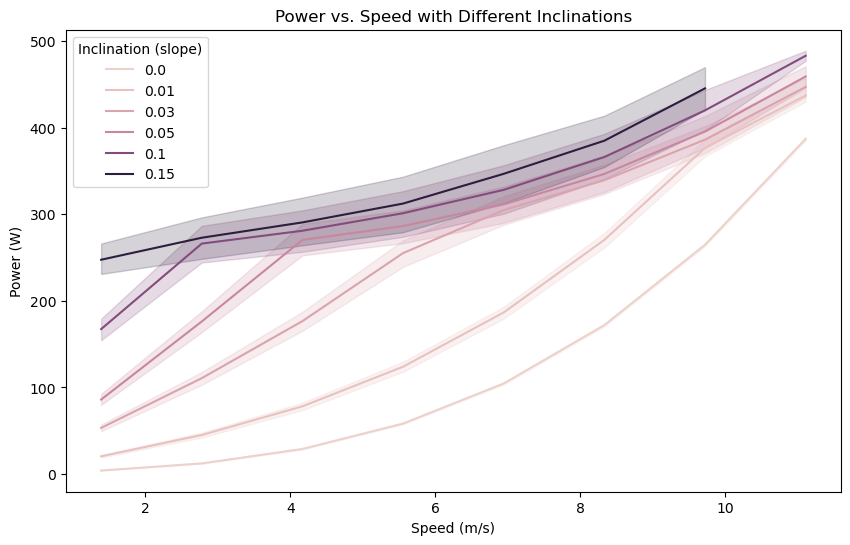

In [54]:


# Filter the DataFrame to include only rows where Power (W) is <= 1000
filtered_df = df[df['Power (W)'] <= 500]
selected_inclinations = [0,0.01,0.03, 0.05, 0.10, 0.15]

# Filter the DataFrame to include only rows with selected inclinations
filtered_df = filtered_df[filtered_df['Inclination (slope)'].isin(selected_inclinations)]

# Create a line pLot
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='Speed (m/s)', y='Power (W)', hue='Inclination (slope)')
plt.title('Power vs. Speed with Different Inclinations')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_3936\518420940.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{x*3.6:.1f}' for x in ax.get_xticks()])  # Convert m/s to km/h and set labels


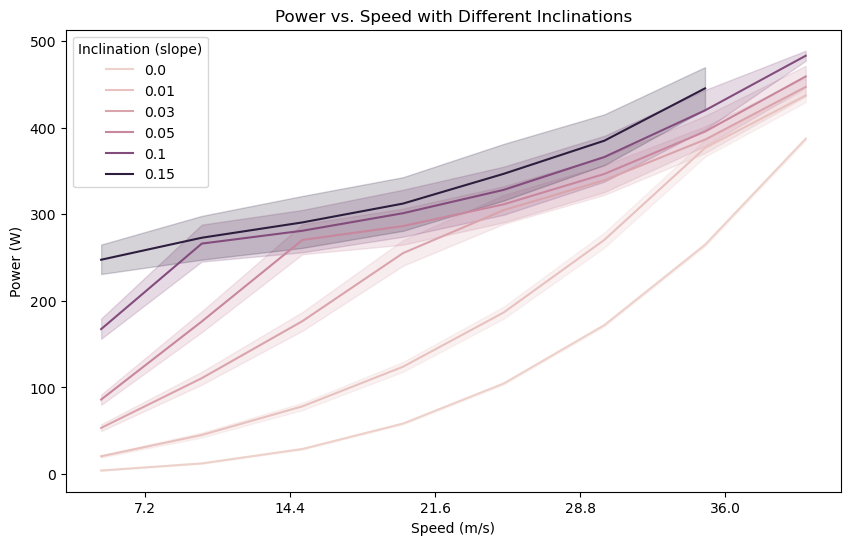

In [55]:


# Create a line plot
plt.figure(figsize=(10, 6))
plot = sns.lineplot(data=filtered_df, x='Speed (m/s)', y='Power (W)', hue='Inclination (slope)')
plt.title('Power vs. Speed with Different Inclinations')

# Convert x-axis tick labels to km/h
ax = plt.gca()  # Get the current axis
ax.set_xticklabels([f'{x*3.6:.1f}' for x in ax.get_xticks()])  # Convert m/s to km/h and set labels

plt.show()



In [60]:
df.to_csv('OneDrive\Jupyter Notebooks\Wattage Calculator\power_chart.csv')

In [2]:
df = pd.read_csv('OneDrive/DataSources/power_chart.csv')

In [3]:
df['username'] = 'USER'

In [ ]:
df=pd.to_csv('OneDrive/DataSources/power_chart.csv')

In [4]:
df.to_csv('OneDrive/DataSources/power_chart.csv', index=False)